# Step 3: Exploratory Data Analysis

## 1. Introduction

   ***Project Goal:*** To develop a model that can predict the number of awards per 100 Full-Time Undergraduates with high accuracy.

   ***Target Variable:*** awards_per_value.

## 2. Imported Packages and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import warnings  
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy")

## 3. Load Data

In [2]:
data = pd.read_csv('collegedata.csv')

In [3]:
data.shape

(3798, 30)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   chronname               3798 non-null   object 
 1   city                    3798 non-null   object 
 2   state                   3798 non-null   object 
 3   level                   3798 non-null   object 
 4   control                 3798 non-null   object 
 5   basic                   3798 non-null   object 
 6   hbcu                    3798 non-null   object 
 7   flagship                3798 non-null   object 
 8   student_count           3798 non-null   int64  
 9   awards_per_value        3798 non-null   float64
 10  awards_per_state_value  3798 non-null   float64
 11  awards_per_natl_value   3798 non-null   float64
 12  exp_award_value         3798 non-null   int64  
 13  exp_award_state_value   3798 non-null   int64  
 14  exp_award_natl_value    3798 non-null   

## 4. Non-numerical Features

In [5]:
df = data.select_dtypes('object')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   chronname  3798 non-null   object
 1   city       3798 non-null   object
 2   state      3798 non-null   object
 3   level      3798 non-null   object
 4   control    3798 non-null   object
 5   basic      3798 non-null   object
 6   hbcu       3798 non-null   object
 7   flagship   3798 non-null   object
dtypes: object(8)
memory usage: 237.5+ KB
None


In [6]:
#Count the number of institutions without duplicate names
print(df['chronname'].nunique())

3793


Even though there are no duplicates in the dataframe as evidenced during data wrangling, there seems to be duplicate names. Let us explore further.

In [7]:
#Print institutions with duplicate names.
duplicate_names = df[df.duplicated(subset=['chronname'])]
print(duplicate_names.iloc[:, :5].to_string(index=False)) #Exclude the index from the print out

                      chronname           city       state  level            control
         Metro Business College Jefferson City    Missouri 2-year Private for-profit
ITT Technical Institute-Madison        Madison   Wisconsin 4-year Private for-profit
         Metro Business College         Arnold    Missouri 2-year Private for-profit
ITT Technical Institute-Madison        Madison Mississippi 2-year Private for-profit
                Anamarc College   Santa Teresa  New Mexico 4-year Private for-profit


As we can see, those are all different institutions.

In [8]:
print(df['city'].nunique())

1787


In [9]:
#Display the unique institutional names
print(df['city'].unique())

['Normal' 'Birmingham' 'Montgomery' ... 'Baraga' 'Escondido' 'Edina']


Let us explore further if 'Normal' is a city name. It appears tht there are two cities in different States that are called 'Normal'.

In [10]:
#Select institutions with a city called 'Normal'.
print(df[df['city'] == 'Normal'].to_string(index=False))

                  chronname   city    state  level control                                              basic hbcu flagship
     Alabama A&M University Normal  Alabama 4-year  Public Masters Colleges and Universities--larger programs    X       no
  Illinois State University Normal Illinois 4-year  Public                     Doctoral/Research Universities   no       no
Heartland Community College Normal Illinois 2-year  Public             Associates--Public Rural-serving Large   no       no


**It is confirmed, there is a city called Normal in Alabama and in Illinois.**

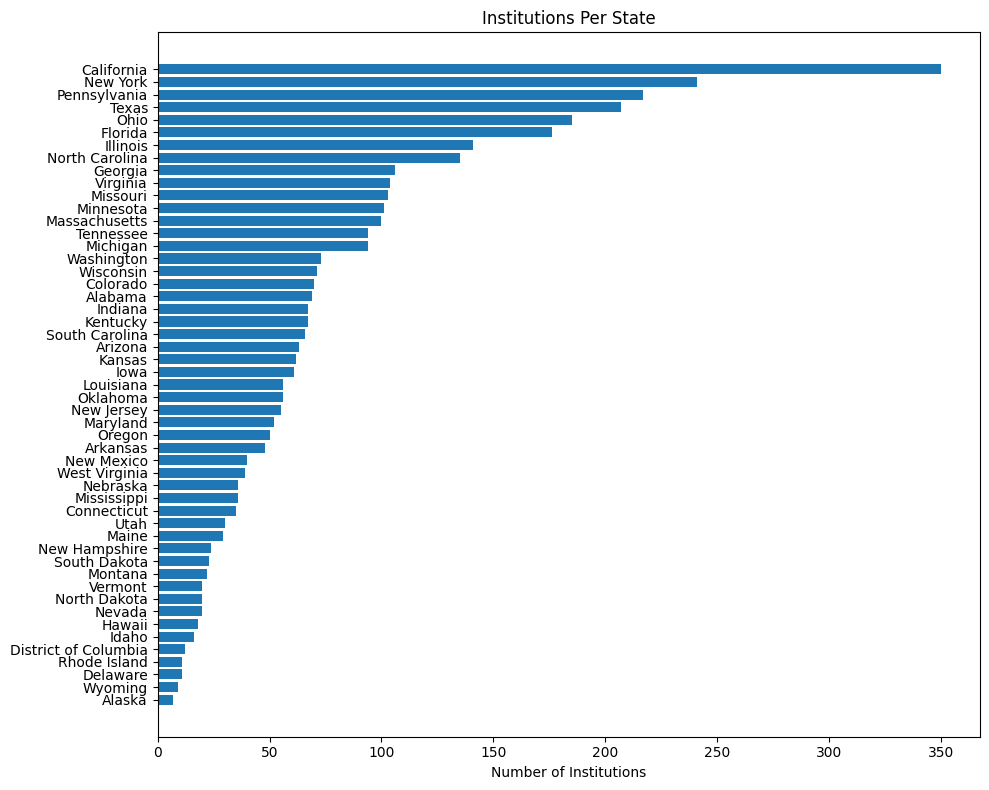

In [11]:
#Count and sort the number of institutions per state
chronname_counts = df.groupby('state')['chronname'].count().sort_values()

#Visualize using a horizontal bar graph
plt.figure(figsize=(10, 8))
plt.barh(chronname_counts.index, chronname_counts.values)
plt.xlabel('Number of Institutions')
plt.title('Institutions Per State')
plt.tight_layout()
plt.show();

California has the highest (350) number of institutions in the dataset. New York, Pennslyvannia, and Texas have atleast 200 institutions. District of Columbia, Rhode Island, Delaware, Wyoming, and Alaska have the lowest number of institutions.

In [12]:
print(df['level'].unique())

['4-year' '2-year']


In [13]:
df['level'].describe()

count       3798
unique         2
top       4-year
freq        2339
Name: level, dtype: object

   - There are 2339 4-year public and private institutions.
   - The rest are 2-year public or private institutions.

**The distribution of 4-year and 2-year institutions in every state is shown below.**

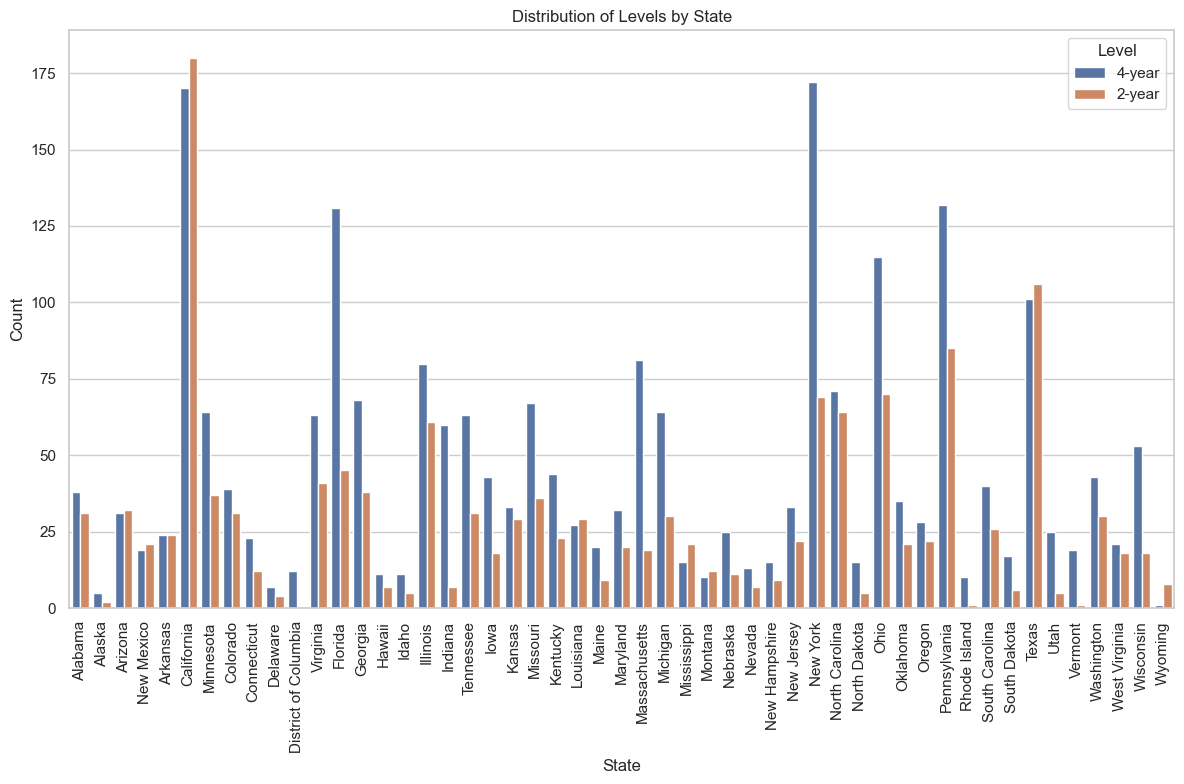

In [14]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,8))
#Create a plot
sns.countplot(data=df, x='state', hue='level')

#Display the plot
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Levels by State')
plt.legend(title='Level', loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show();

- NY and CA have the highest number 4-year institutions.
- CA has, by far, the highest number of 2-year institutions.
- No 2-year institutions reported from the District of Columbia.
- Rhode Island, Vermont, and Alaska have few reported 2-year institutions.
- Wyoming has the lowest number of 4-year institutions recorded.

In [15]:
#Identify the labels in the 'control' feature
df['control'].unique()

array(['Public', 'Private not-for-profit', 'Private for-profit'],
      dtype=object)

In [16]:
print(df['control'].describe())

count       3798
unique         3
top       Public
freq        1558
Name: control, dtype: object


- There are more Public institutions than Private ones.

**Visualize the distribution of Public, Private not-for-profit, and Private_for-profit institutions in each State.**

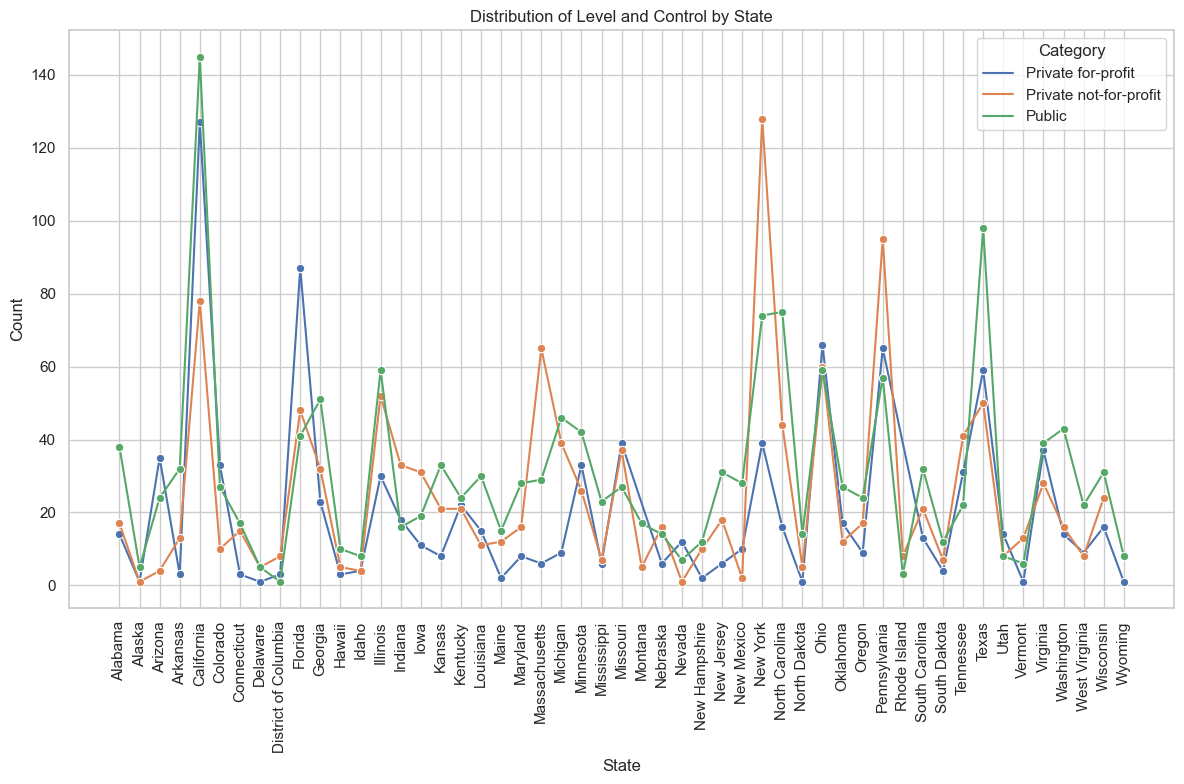

In [17]:
#Group the data per state and control features
grp_data = df.groupby(['state', 'control']).size().reset_index(name='count')

# Create line plots
plt.figure(figsize=(12, 8))

#Create lineplots based on the grouped data
sns.lineplot(x='state', y='count', hue='control', data=grp_data, marker='o')

plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Level and Control by State')
plt.legend(title='Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show();

- The above lineplot is in agreement with the ealier countplot regarding the distribution of various institutions across the States.

In [18]:
print(df['basic'].value_counts())

basic
Associates--Private For-profit                                                  517
Masters Colleges and Universities--larger programs                              386
Baccalaureate Colleges--Diverse Fields                                          343
Associates--Public Rural-serving Medium                                         289
Baccalaureate Colleges--Arts & Sciences                                         252
Masters Colleges and Universities--medium programs                              169
Associates--Public Rural-serving Large                                          128
Associates--Public Urban-serving Multicampus                                    125
Baccalaureate/Associates Colleges                                               124
Schools of art- music- and design                                               114
Associates--Public Rural-serving Small                                          111
Associates--Public Suburban-serving Single Campus                     

In [19]:
print(df['hbcu'].value_counts())

hbcu
no    3704
X       94
Name: count, dtype: int64


In [20]:
#Rename the label 'X' to 'yes'
df['hbcu'] = df['hbcu'].replace('X', 'yes')

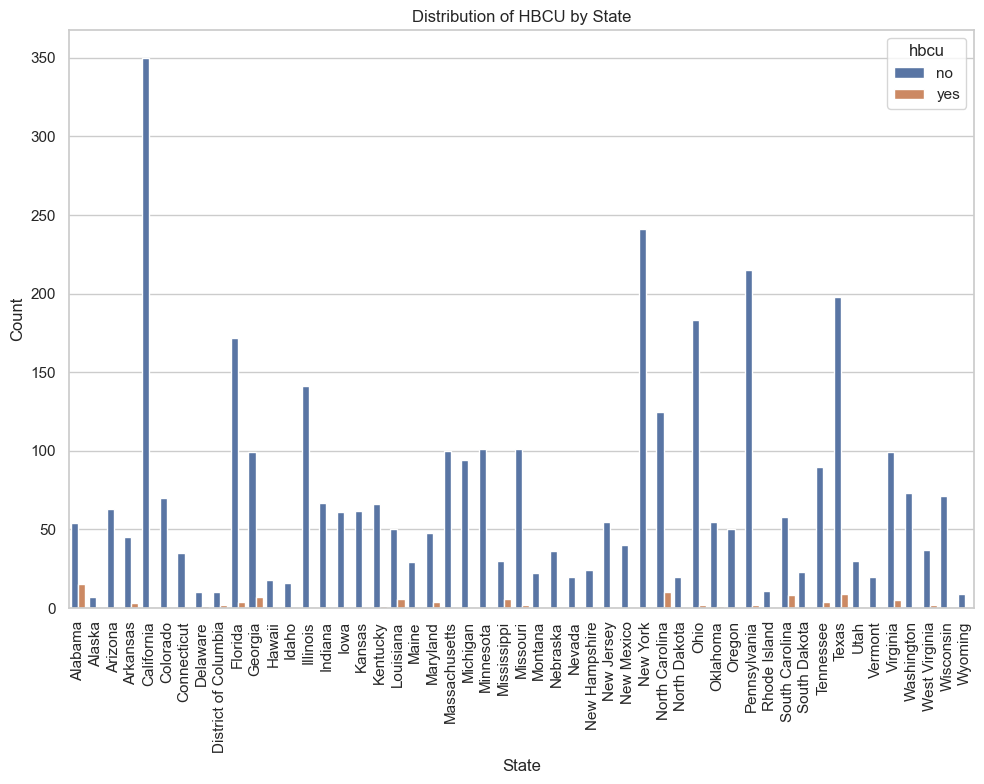

In [21]:
g_data=df.groupby(['state', 'hbcu']).size().reset_index(name='count')
plt.figure(figsize=(10, 8))
sns.barplot(x='state', y='count', data=g_data, hue='hbcu')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of HBCU by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show();

In [22]:
print(df['flagship'].value_counts())

flagship
no    3748
X       50
Name: count, dtype: int64


In [23]:
#Rename the label 'X' to 'yes'
df['flagship'] = df['flagship'].replace('X', 'yes')

In [24]:
state_flagship_hbcu = df.groupby(by='state')[['hbcu', 'flagship']].value_counts().unstack(fill_value=0)
state_flagship_hbcu.head(20)

flagship                    no  yes
state                hbcu          
Alabama              no     53    1
                     yes    15    0
Alaska               no      6    1
Arizona              no     62    1
Arkansas             no     44    1
                     yes     3    0
California           no    349    1
Colorado             no     69    1
Connecticut          no     34    1
Delaware             no      9    1
                     yes     1    0
District of Columbia no     10    0
                     yes     2    0
Florida              no    171    1
                     yes     4    0
Georgia              no     98    1
                     yes     7    0
Hawaii               no     17    1
Idaho                no     15    1
Illinois             no    140    1

## Numerical Columns

In [25]:
df_num = data.select_dtypes('number')
df_num.head()

student_count  awards_per_value  awards_per_state_value  \
0           4051              14.2                    18.8   
1          11502              20.9                    18.8   
2            322              29.9                    17.8   
3           5696              20.9                    18.8   
4           5356              11.6                    18.8   

   awards_per_natl_value  exp_award_value  exp_award_state_value  \
0                   21.5           105331                  75743   
1                   21.5           136546                  75743   
2                   22.5            58414                  92268   
3                   21.5            64418                  75743   
4                   21.5           132407                  75743   

   exp_award_natl_value  ft_pct  fte_value  med_sat_value  ...  \
0                 66436    93.8       3906          823.0  ...   
1                 66436    72.7      10032         1146.0  ...   
2                101725    62.7        294            NaN  ...   
3                 66436    74.4       5000         1180.0  ...   
4                 66436    91.0       5035          830.0  ...   

   grad_100_value  grad_150_value  pell_value  retain_value  ft_fac_value  \
0            10.0            29.1        71.2          63.1          82.8   
1            29.4            53.5        35.1          80.2          92.4   
2             0.0            66.7        68.4          37.5          67.2   
3            16.5            48.4        32.8          81.0          65.5   
4             8.8            25.2        82.7          62.2          67.0   

   state_sector_ct  carnegie_ct  counted_pct  cohort_size  num_similar  
0               13          386         99.7        882.0         20.0  
1               13          106         56.0       1376.0         20.0  
2               16          252        100.0          3.0         20.0  
3               13          106         43.1        759.0         20.0  
4               13          386         88.0       1351.0         20.0  

[5 rows x 22 columns]

In [26]:
df_num.describe().T

count          mean            std      min  \
student_count           3798.0   4476.135334    7376.868923     23.0   
awards_per_value        3798.0     23.435176      10.615140      0.5   
awards_per_state_value  3798.0     22.845656       6.322818      3.2   
awards_per_natl_value   3798.0     22.484044       4.770449     16.5   
exp_award_value         3798.0  65074.471827  107437.917345      0.0   
exp_award_state_value   3798.0  61282.189837   33295.027077  12346.0   
exp_award_natl_value    3798.0  60903.577672   29892.281333  24795.0   
ft_pct                  3794.0     71.092198      25.056818      3.8   
fte_value               3798.0   3716.866772    5998.058385     33.0   
med_sat_value           1337.0   1059.889304     132.819927    666.0   
aid_value               3797.0   7960.445878    6419.658196    294.0   
endow_value             2323.0  32544.046061  123317.321123      0.0   
grad_100_value          3467.0     28.364465      23.312730      0.0   
grad_150_value          3467.0     42.407586      23.460824      0.0   
pell_value              3797.0     47.572057      20.065216      0.0   
retain_value            3535.0     66.231853      17.033907      0.0   
ft_fac_value            3785.0     45.107477      24.726902      0.0   
state_sector_ct         3798.0     34.284360      28.311303      1.0   
carnegie_ct             3798.0    232.557662     156.960653      1.0   
counted_pct             3372.0     57.675919      25.524881      0.0   
cohort_size             3467.0    658.306028     961.782580      1.0   
num_similar             3579.0     20.000000       0.000000     20.0   

                             25%      50%        75%        max  
student_count             581.25   1794.5    5172.00   170144.0  
awards_per_value           17.30     21.3      26.50      137.6  
awards_per_state_value     19.30     22.2      24.20       59.9  
awards_per_natl_value      21.50     22.5      24.60       32.8  
exp_award_value         32311.25  50578.5   76930.25  5282095.0  
exp_award_state_value   35830.00  54025.0   79310.00   188870.0  
exp_award_natl_value    37780.00  38763.0  101725.00   101725.0  
ft_pct                     49.80     77.0      93.90      100.0  
fte_value                 616.25   1603.0    4190.50   126411.0  
med_sat_value             974.00   1040.0    1123.00     1534.0  
aid_value                4018.00   5207.0    9343.00    41580.0  
endow_value              1431.00   5466.0   19490.50  2505435.0  
grad_100_value              9.00     22.5      43.65      100.0  
grad_150_value             22.70     41.1      60.25      100.0  
pell_value                 32.40     44.7      62.50      100.0  
retain_value               56.10     66.9      78.10      100.0  
ft_fac_value               25.70     41.5      63.00      100.0  
state_sector_ct            14.00     25.0      48.00      116.0  
carnegie_ct               106.00    169.0     343.00      517.0  
counted_pct                38.10     58.6      77.70      150.0  
cohort_size               131.00    356.0     782.50    16229.0  
num_similar                20.00     20.0      20.00       20.0

In [27]:
df_num.corr()

student_count  awards_per_value  \
student_count                1.000000         -0.195007   
awards_per_value            -0.195007          1.000000   
awards_per_state_value      -0.268093          0.547838   
awards_per_natl_value       -0.310766          0.488051   
exp_award_value             -0.031317         -0.183489   
exp_award_state_value       -0.041469         -0.173671   
exp_award_natl_value        -0.044705         -0.170328   
ft_pct                      -0.200322          0.205116   
fte_value                    0.974339         -0.170597   
med_sat_value                0.216069          0.163281   
aid_value                   -0.088551         -0.072468   
endow_value                 -0.066918          0.054633   
grad_100_value              -0.129991          0.284729   
grad_150_value              -0.068056          0.310146   
pell_value                  -0.275637          0.207726   
retain_value                 0.116680          0.123903   
ft_fac_value                 0.053472         -0.008872   
state_sector_ct              0.041672         -0.108196   
carnegie_ct                 -0.209210          0.268275   
counted_pct                 -0.147212          0.111620   
cohort_size                  0.746736         -0.108520   
num_similar                       NaN               NaN   

                        awards_per_state_value  awards_per_natl_value  \
student_count                        -0.268093              -0.310766   
awards_per_value                      0.547838               0.488051   
awards_per_state_value                1.000000               0.818052   
awards_per_natl_value                 0.818052               1.000000   
exp_award_value                      -0.052004              -0.025792   
exp_award_state_value                -0.215728              -0.117915   
exp_award_natl_value                 -0.183558              -0.145108   
ft_pct                                0.419271               0.523118   
fte_value                            -0.222439              -0.252271   
med_sat_value                         0.127955               0.136952   
aid_value                            -0.025713               0.014602   
endow_value                           0.114515               0.166417   
grad_100_value                        0.294198               0.320117   
grad_150_value                        0.395917               0.439258   
pell_value                            0.334531               0.412877   
retain_value                          0.097127               0.109424   
ft_fac_value                          0.014352               0.020234   
state_sector_ct                      -0.131800              -0.090373   
carnegie_ct                           0.472752               0.543263   
counted_pct                           0.279217               0.364832   
cohort_size                          -0.159107              -0.196006   
num_similar                                NaN                    NaN   

                        exp_award_value  exp_award_state_value  \
student_count                 -0.031317              -0.041469   
awards_per_value              -0.183489              -0.173671   
awards_per_state_value        -0.052004              -0.215728   
awards_per_natl_value         -0.025792              -0.117915   
exp_award_value                1.000000               0.247555   
exp_award_state_value          0.247555               1.000000   
exp_award_natl_value           0.231214               0.804549   
ft_pct                         0.138867               0.299177   
fte_value                     -0.016881              -0.001381   
med_sat_value                  0.497131               0.154967   
aid_value                      0.262548               0.635873   
endow_value                    0.621132               0.238887   
grad_100_value                 0.091913               0.316856   
grad_150_value                 0.057888               0.297922

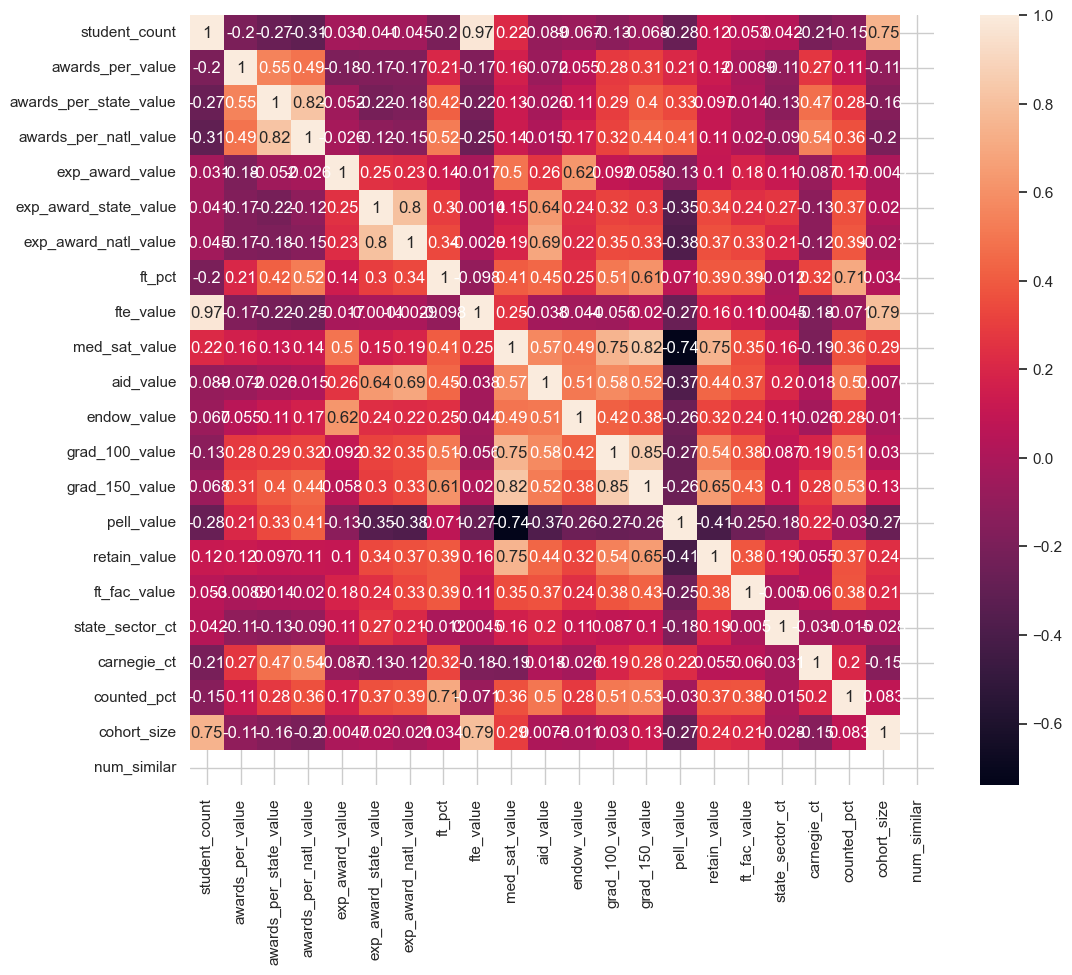

In [28]:
plt.figure(figsize=(12,10))
# Calculate the correlation matrix
corr_matrix = df_num.corr()
sns.heatmap(corr_matrix)
plt.show();

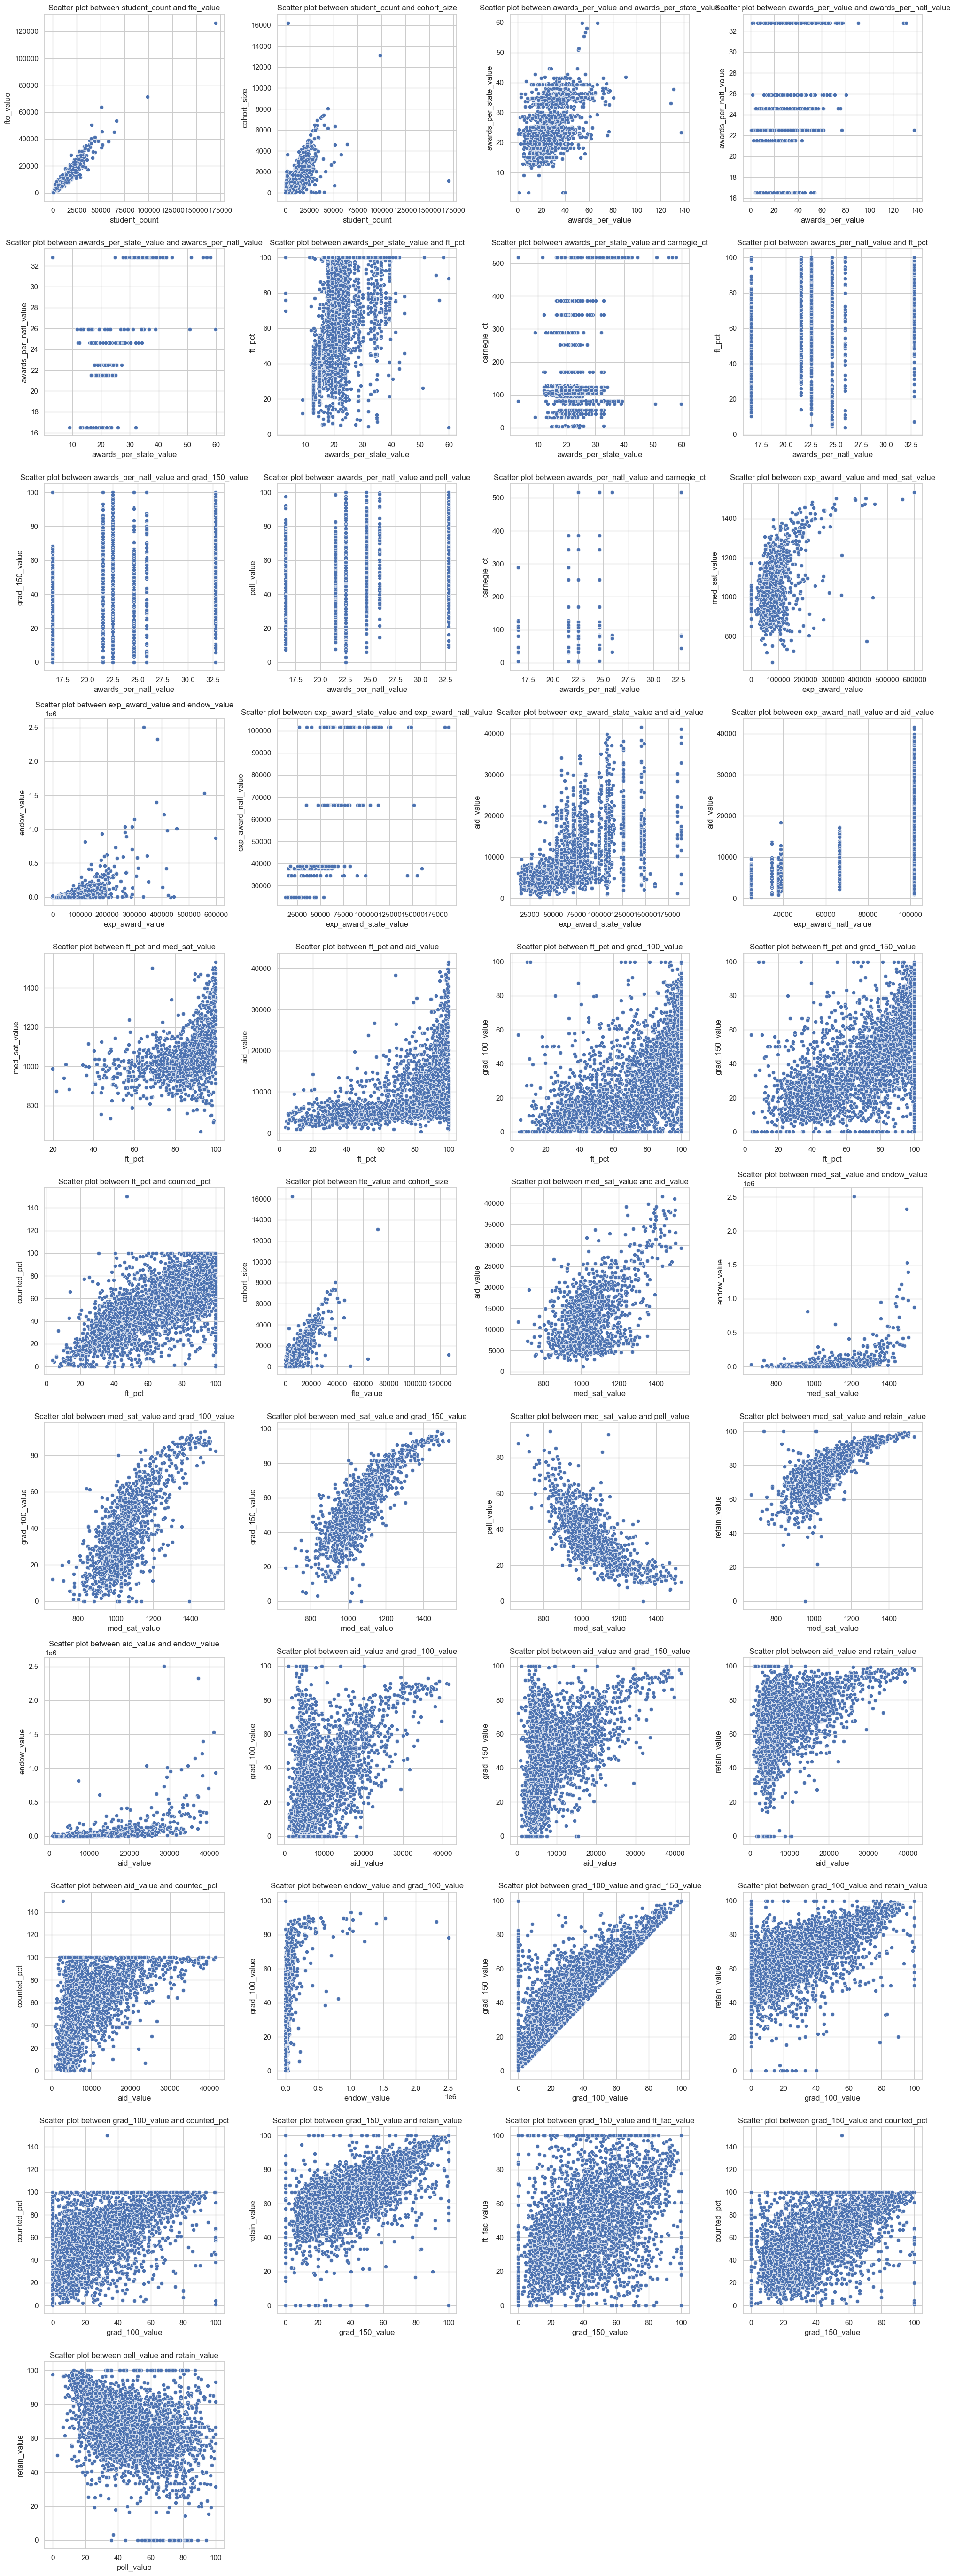

In [29]:
# Create a mask to display only the upper triangle
mask = (abs(corr_matrix) >= 0.4) & (corr_matrix != 1) #Filter corr below 0.4 and self-correlations

# Find pairs of columns with correlation >= 0.4
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) 
                   for i in range(len(corr_matrix)) 
                   for j in range(i+1, len(corr_matrix)) 
                   if mask.iloc[i, j]]

# Calculate the number of rows needed to display 4 pairplots
num_rows = (len(high_corr_pairs) + (4 - 1)) // 4

# Plot scatter plots for these pairs
fig, axs = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))

# Flatten the axs array if there's more than one row
if num_rows > 1:
    axs = axs.flatten()

for i, pair in enumerate(high_corr_pairs):
    sns.scatterplot(x=df_num[pair[0]], y=df_num[pair[1]], ax=axs[i])
    axs[i].set_title(f'Scatter plot between {pair[0]} and {pair[1]}')
    axs[i].set_xlabel(pair[0])
    axs[i].set_ylabel(pair[1])

# Remove any unused subplots
for j in range(i + 1, num_rows * 4):
    fig.delaxes(axs[j])
#Display the plots
plt.tight_layout()
plt.show();

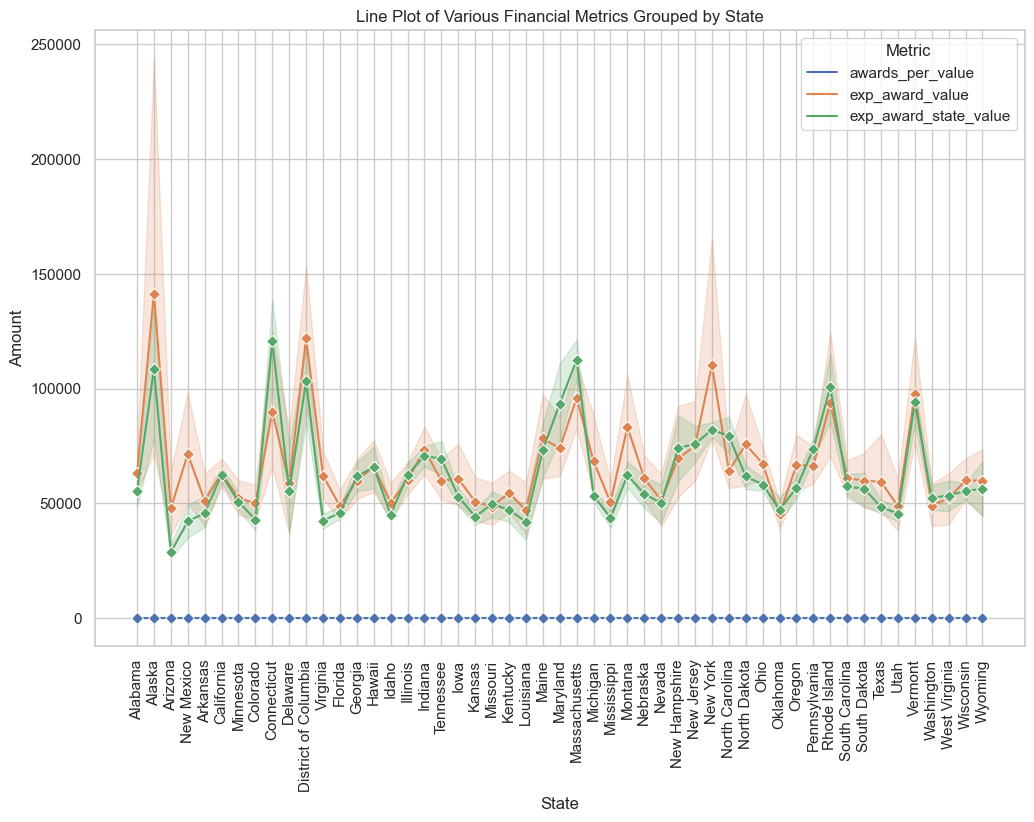

In [30]:
# Melt the DatFrame
df_melted = data.melt(id_vars=['state'], value_vars=['awards_per_value', 'exp_award_value', 'exp_award_state_value'], 
                   var_name='variable', value_name='value')
# Plot
plt.figure(figsize=(12,8))
sns.lineplot(data=df_melted, x='state', y='value', hue='variable', marker='D')
plt.title('Line Plot of Various Financial Metrics Grouped by State')
plt.xlabel('State')
plt.ylabel('Amount')
plt.legend(title='Metric')
plt.xticks(rotation=90)

# Displaying the plot
plt.show();

### Outliers

- The scatter plots above indicate the presence of outliers on several features. Outliers can have a big influence of statistical analyses and machine learning developments. Read more at (https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/). 
- I will us the most common, IQR method, to handle outliers.

In [31]:
df_num.shape

(3798, 22)

#### The Dependent Variable

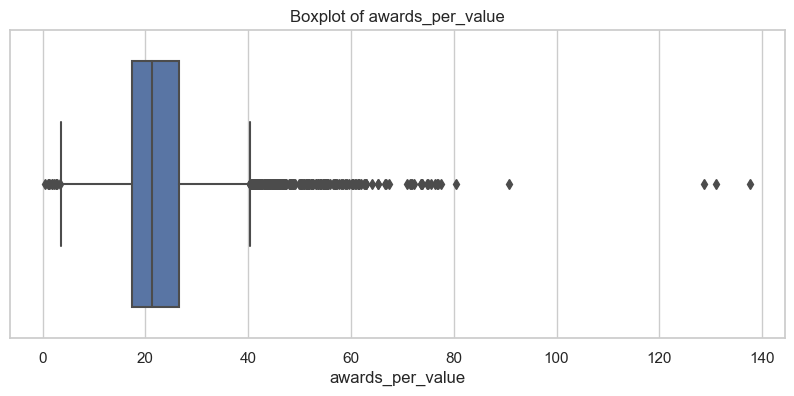

In [32]:
#Create a boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_num['awards_per_value'])
plt.title('Boxplot of awards_per_value')
plt.show();

In [33]:
num_awards_more_than_80 = data[data['awards_per_value'] >= 80]
print(num_awards_more_than_80[['chronname', 'awards_per_value']].to_string(index=False))

                                 chronname  awards_per_value
      Samaritan Hospital School of Nursing              80.4
West Virginia Business College at Wheeling             128.7
                         Parker University             137.6
     Pinnacle Career Institute at Lawrence              90.8
                   North Central Institute             131.1


- At Samaritan, a private not-for-profit college, 86% of tudents receive grant or scholarship aid (https://www.usnews.com/education/community-colleges/samaritan-hospital-school-of-nursing-CC12993).
- At Wheeling, 100% of the students received financial aid. It was a private for profit institution that closed down in 2017 (https://www.communitycollegereview.com/west-virginia-business-college-wheeling-profile).
- At Parker, 92% of the students received financial aid through grants or loans (https://datausa.io/profile/university/parker-university).
- At Lawrence, between 66 -70% of students received financial aid through loans and grants. A for profit institution. (https://datausa.io/profile/university/pinnacle-career-institute-lawrence).
- At North Central, a private for profit college, 33% of students receive grant or scholarship aid. (https://www.usnews.com/education/community-colleges/north-central-institute-CC17071)

In [34]:
#Define a function to drop outliers based on IQR method
def drop_outliers_iqr(df):
    """Returns a DataFrame with outliers removed"""
    def filter_outliers(col):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        IQR = q3 - q1
        lower = q1 - 1.5 * IQR
        upper = q3 + 1.5 * IQR
        return col[(col >= lower) & (col <= upper)]
    #Create a DataFrame by negating outliers
    cleaned_df = df.apply(filter_outliers)
    
    return cleaned_df

**I will drop outliers using the function above, from all numeric columns.**

In [35]:
clean_df = drop_outliers_iqr(df_num)

In [36]:
print(clean_df.shape)

(3798, 22)


In [37]:
clean_df.isna().sum()

student_count              385
awards_per_value           266
awards_per_state_value     485
awards_per_natl_value     1391
exp_award_value            218
exp_award_state_value      141
exp_award_natl_value         0
ft_pct                       4
fte_value                  381
med_sat_value             2527
aid_value                  374
endow_value               1748
grad_100_value             349
grad_150_value             331
pell_value                   1
retain_value               322
ft_fac_value                13
state_sector_ct            229
carnegie_ct                  0
counted_pct                427
cohort_size                630
num_similar                219
dtype: int64

In [38]:
clean_df = clean_df.drop(columns='med_sat_value')

In [39]:
clean_df['num_similar'] = clean_df['num_similar'].fillna(value=0)

#### Combined DataFrames: Non-numeric/Numeric  Features

In [40]:
df2 = pd.concat([df, clean_df], axis=1)
print(df2.head(2))

                             chronname        city    state   level control  \
0               Alabama A&M University      Normal  Alabama  4-year  Public   
1  University of Alabama at Birmingham  Birmingham  Alabama  4-year  Public   

                                               basic hbcu flagship  \
0  Masters Colleges and Universities--larger prog...  yes       no   
1  Research Universities--very high research acti...   no       no   

   student_count  awards_per_value  ...  grad_100_value  grad_150_value  \
0         4051.0              14.2  ...            10.0            29.1   
1        11502.0              20.9  ...            29.4            53.5   

   pell_value  retain_value  ft_fac_value  state_sector_ct  carnegie_ct  \
0        71.2          63.1          82.8             13.0          386   
1        35.1          80.2          92.4             13.0          106   

   counted_pct  cohort_size  num_similar  
0         99.7        882.0         20.0  
1         56.

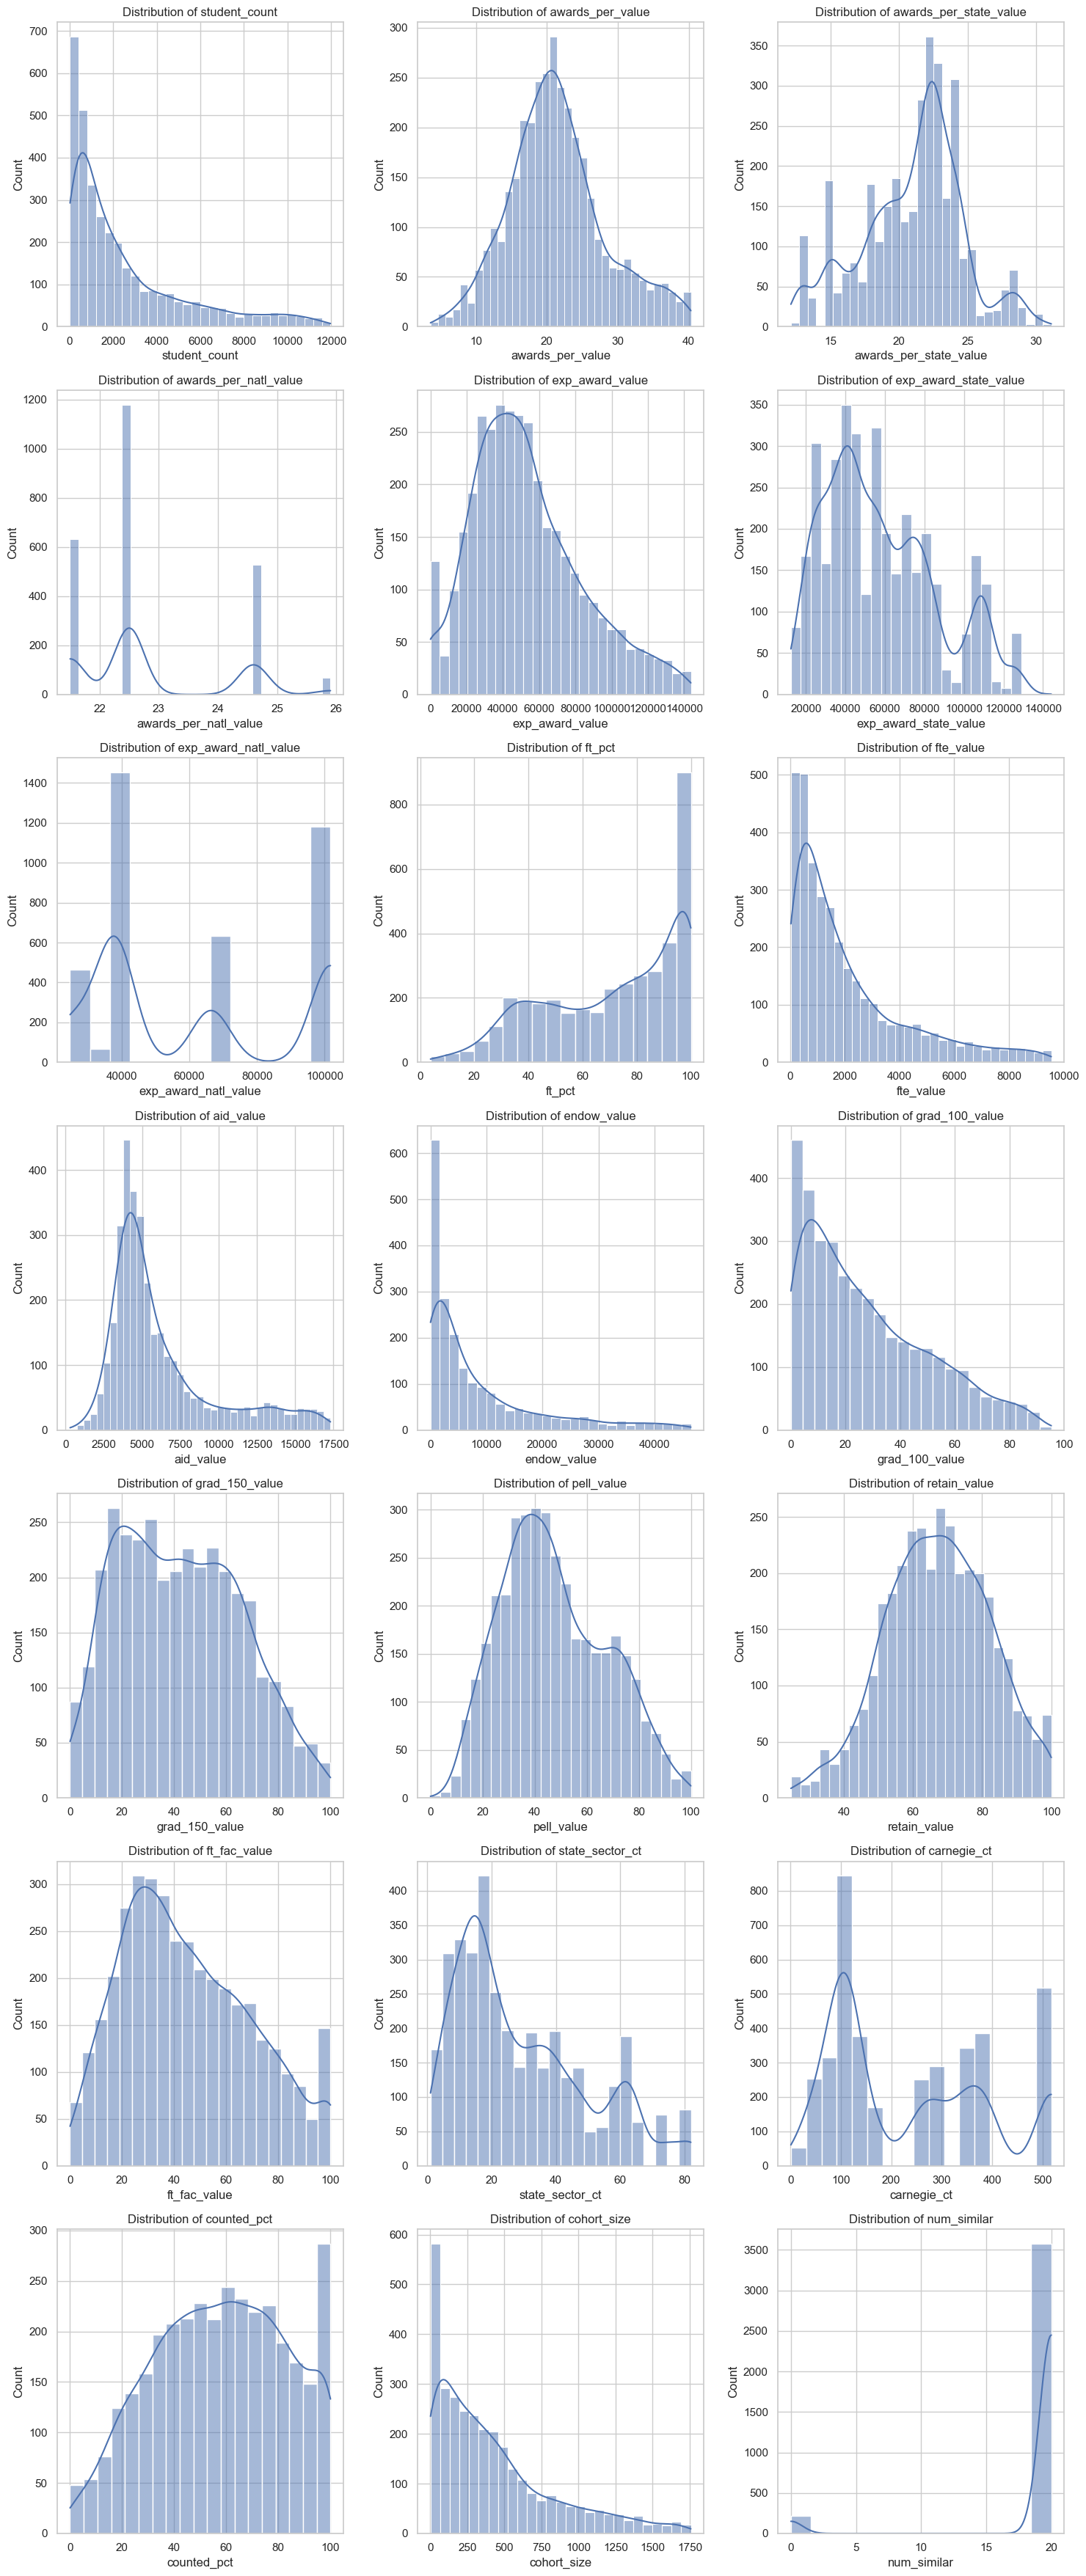

In [41]:
# Visualize distributions of all features using both histograms and kde
def visualize_distributions(df):
    n_features = df.select_dtypes(include=['number']).columns
    n_plots = len(n_features)
    fig, axes = plt.subplots(nrows=n_plots, ncols=3, figsize=(15, 5 * n_plots))
    axes = axes.flatten()
    
    for i, feature in enumerate(n_features):
        sns.histplot(df[feature], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')

    # Remove empty subplots
    for i in range(n_plots, len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show();

visualize_distributions(df2)

### Save data to a csv file

In [42]:
df2.to_csv('collegedata_EDAd.csv', index=False)

print("DataFrame saved to 'collegedata_EDAd.csv'")

DataFrame saved to 'collegedata_EDAd.csv'


## Summary